In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
import utils_paths
from numpy import array
from tqdm import tqdm
#使用到的库，如缺少可使用pip安装

# 数据格式1

In [49]:
test_df= pd.read_csv('new_data.csv')

In [50]:
test_df

,# source: DXY @ https://3g.dxy.cn/newh5/view/pneumonia
0,# update: 2020-01-22 03:28:10 CST
1,# place|confirmed_cases|deaths|notes|sources
2,Ningxia|0|0||
3,Anhui|0|0||
4,Guangdong|17|0||
5,Beijing|10|0||
6,Henan|1|0||
7,Hainan|0|0||
8,Guangxi|0|0||
9,Zhejiang|5|0||


### 预处理

In [7]:
all_data = pd.DataFrame({'date_time':[],
                         'place':[],
                      'confirm':[],
                      'deaths':[]
                        
                        })

In [8]:
for i in range(10):
    print(test_df.loc[i].values[0].split('|'))

['# update: 2020-01-22 03:28:10 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Ningxia', '0', '0', '', '']
['Anhui', '0', '0', '', '']
['Guangdong', '17', '0', '', '']
['Beijing', '10', '0', '', '']
['Henan', '1', '0', '', '']
['Hainan', '0', '0', '', '']
['Guangxi', '0', '0', '', '']
['Zhejiang', '5', '0', '', '']


In [9]:
all_data

,confirm,date_time,deaths,place


In [10]:
import datetime
# str转时间格式：

for i in range(len(test_df)-1):
    
    if test_df.loc[i].values[0][:8]=='# update':
        time =datetime.datetime.strptime(test_df.loc[i].values[0][10:-13], "%Y-%m-%d") 
        continue
    if test_df.loc[i].values[0][0]=='#':
        continue
    all_data = all_data.append([{'date_time':time,'place':test_df.loc[i].values[0].split('|')[0],'confirm':test_df.loc[i].values[0].split('|')[1],
                      'deaths':test_df.loc[i].values[0].split('|')[2]}], ignore_index=True)

In [11]:
all_data['confirm'] = all_data['confirm'].apply(float)


In [12]:
all_data['deaths'] = all_data['deaths'].apply(float)


In [13]:
all_data

,confirm,date_time,deaths,place
0,0.0,2020-01-22,0.0,Ningxia
1,0.0,2020-01-22,0.0,Anhui
2,17.0,2020-01-22,0.0,Guangdong
3,10.0,2020-01-22,0.0,Beijing
4,1.0,2020-01-22,0.0,Henan
5,0.0,2020-01-22,0.0,Hainan
6,0.0,2020-01-22,0.0,Guangxi
7,5.0,2020-01-22,0.0,Zhejiang
8,6.0,2020-01-22,0.0,Shanghai
9,1.0,2020-01-22,0.0,Sichuan


In [14]:
all_data[all_data.place=='CHINA TOTAL'].iloc[:10]

,confirm,date_time,deaths,place
2966,1.330000e+03,2020-01-25,4.100000e+01,CHINA TOTAL
3000,1.355000e+03,2020-01-25,4.100000e+01,CHINA TOTAL
3034,1.369000e+03,2020-01-25,4.100000e+01,CHINA TOTAL
3068,1.372000e+03,2020-01-25,4.100000e+01,CHINA TOTAL
3102,1.377000e+03,2020-01-25,4.100000e+01,CHINA TOTAL
3136,7.617863e+53,2020-01-26,4.000000e+33,CHINA TOTAL
3170,1.053838e+54,2020-01-26,5.210000e+33,CHINA TOTAL
3204,1.052105e+57,2020-01-26,5.200100e+33,CHINA TOTAL
3238,1.052105e+57,2020-01-26,5.200100e+33,CHINA TOTAL
3272,1.052105e+57,2020-01-26,5.200100e+33,CHINA TOTAL


### 仔细观察上述数据，可以发现全国的确诊数据(CHINA TOTAL)中 1月26/27号的数字出现异常，查看从丁香园爬取的原始数据发现此处原始数据存在问题，于是直接通过合并各省份数据来得出全国确诊数据

In [15]:
province_data = all_data.groupby([all_data['place'],all_data['date_time']]).mean()
#del province_data['day']

#按照省份和时间进行分组


In [16]:
province_data  

confirm      deaths
place    date_time                          
Anhui    2020-01-22     0.481481    0.000000
         2020-01-23     5.444444    0.000000
         2020-01-24    13.500000    0.000000
         2020-01-25    25.285714    0.000000
         2020-01-26    53.000000    0.000000
         2020-01-27    67.500000    0.000000
         2020-01-28   100.600000    0.000000
         2020-01-29   150.629630    0.000000
         2020-01-30   185.777778    0.000000
         2020-01-31   226.428571    0.000000
         2020-02-01   283.153846    0.000000
         2020-02-02   330.290323    0.000000
         2020-02-03   392.457143    0.000000
         2020-02-04   466.064516    0.000000
         2020-02-05   517.931034    0.000000
         2020-02-06   575.750000    0.000000
         2020-02-07   648.812500    0.000000
         2020-02-08   717.888889    0.000000
         2020-02-09   766.615385    0.730769
         2020-02-10   806.625000    2.083333
         2020-02-11   854.545455    3.818182
         2020-02-12   889.000000    4.000000
Beijing  2020-01-22    10.000000    0.000000
         2020-01-23    16.074074    0.000000
         2020-01-24    26.944444    0.000000
         2020-01-25    37.071429    0.000000
         2020-01-26    49.833333    0.000000
         2020-01-27    71.333333    0.083333
         2020-01-28    83.300000    1.000000
         2020-01-29    97.037037    1.000000
...                          ...         ...
Yunnan   2020-02-05   122.551724    0.000000
         2020-02-06   128.250000    0.000000
         2020-02-07   134.718750    0.000000
         2020-02-08   138.000000    0.000000
         2020-02-09   140.230769  115.000000
         2020-02-10   142.000000    0.000000
         2020-02-11   150.090909    0.000000
         2020-02-12   154.000000    0.000000
Zhejiang 2020-01-22     8.703704    0.000000
         2020-01-23    16.925926    0.000000
         2020-01-24    37.666667    0.000000
         2020-01-25    51.142857    0.000000
         2020-01-26    90.000000    0.000000
         2020-01-27   120.000000    0.000000
         2020-01-28   164.000000    0.000000
         2020-01-29   291.444444    0.000000
         2020-01-30   384.000000    0.000000
         2020-01-31   502.071429    0.000000
         2020-02-01   586.282051    0.000000
         2020-02-02   645.000000    0.032258
         2020-02-03   704.200000    0.000000
         2020-02-04   798.516129    0.000000
         2020-02-05   876.793103    0.000000
         2020-02-06   931.875000    0.000000
         2020-02-07   993.000000    0.000000
         2020-02-08  1034.000000    0.000000
         2020-02-09  1066.692308    0.000000
         2020-02-10  1086.333333    0.000000
         2020-02-11  1110.181818    0.000000
         2020-02-12  1131.000000    0.000000

[752 rows x 2 columns]

In [17]:
all_data.place.unique()

array(['Ningxia', 'Anhui', 'Guangdong', 'Beijing', 'Henan', 'Hainan',
       'Guangxi', 'Zhejiang', 'Shanghai', 'Sichuan', 'Liaoning',
       'Chongqing', 'Tianjin', 'Jiangxi', 'Jilin', 'Guizhou', 'Shandong',
       'Hunan', 'Heilongjiang', 'Hong Kong', 'Taiwan', 'Yunnan', 'Hubei',
       'Macau', 'Shanxi', 'Fujian', 'Hebei', 'Jiangsu', 'Shaanxi',
       'Inner Mongolia', 'Gansu', 'Xinjiang', 'Qinghai', 'CHINA TOTAL',
       'Tibet'], dtype=object)

In [18]:
province = []
for name in province_data.index.values:
    province.append(name[0])
province = np.unique(province)

In [19]:
total = province_data.loc['CHINA TOTAL'] #CHINA TOTAL数据有点问题，简单粗暴的解决一下

In [20]:
except_hb = province_data.loc['CHINA TOTAL'] #统计一下全国除湖北地区的确诊人数

In [21]:
total.loc[:,:] = 0
except_hb.loc[:,:] = 0

G:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


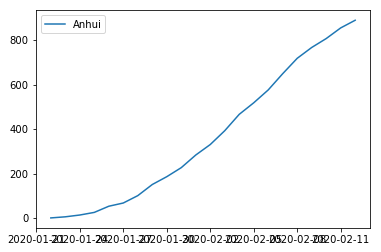

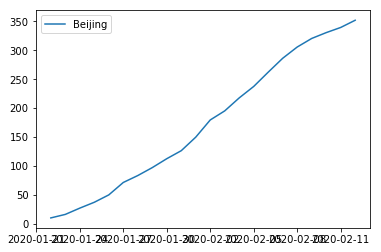

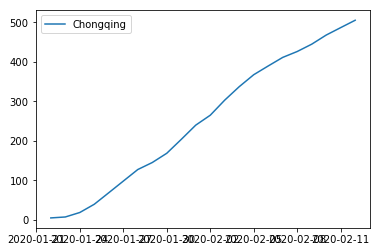

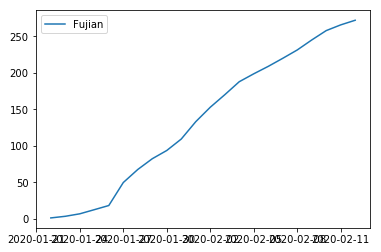

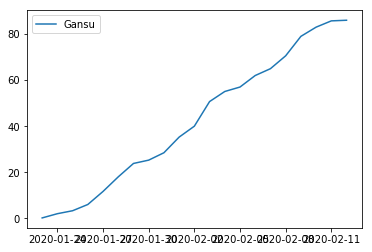

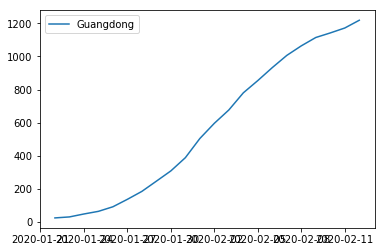

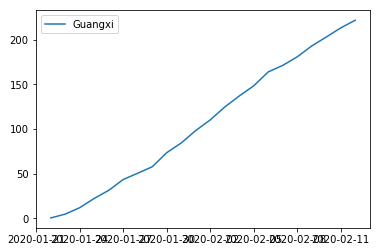

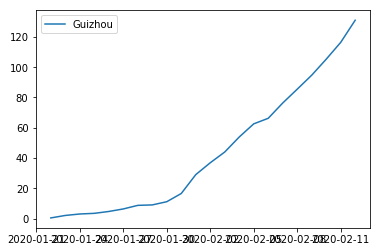

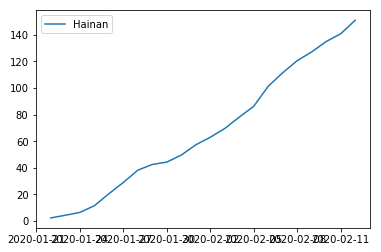

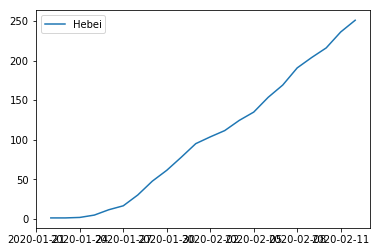

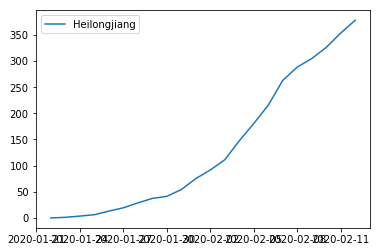

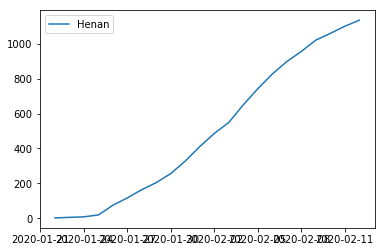

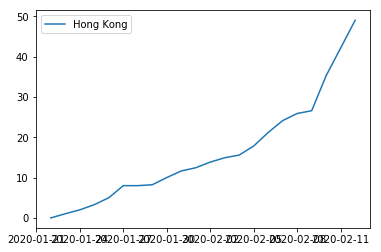

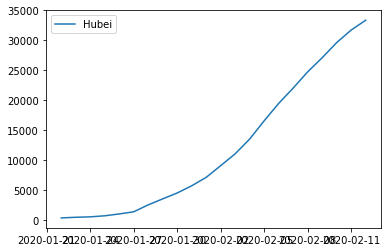

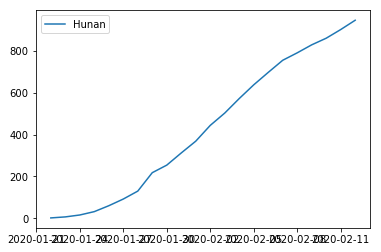

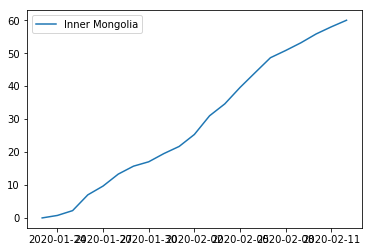

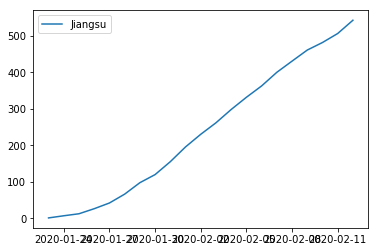

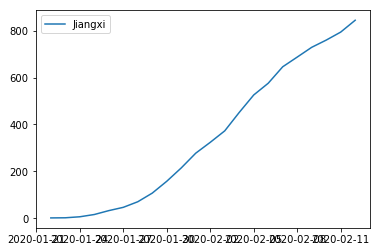

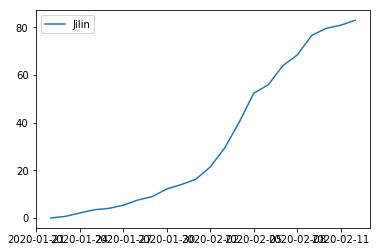

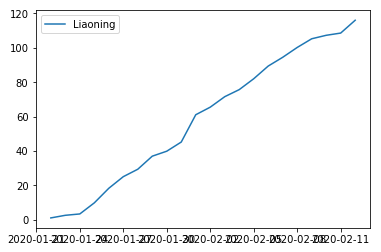

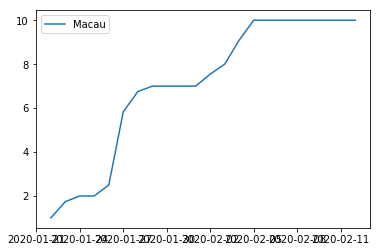

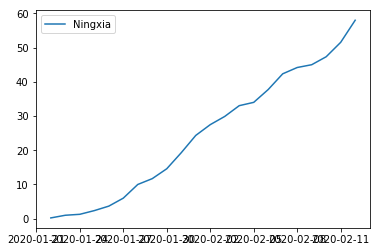

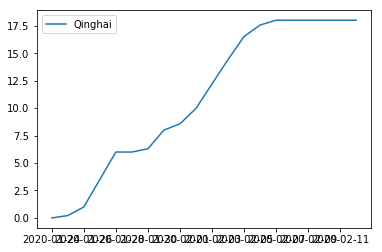

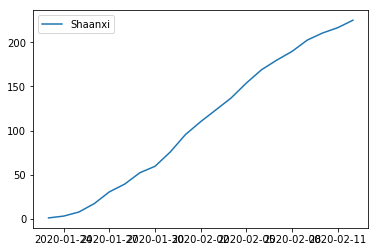

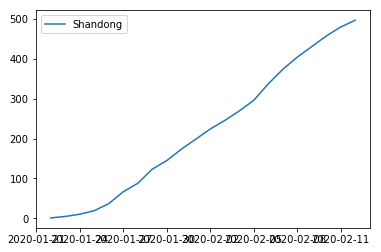

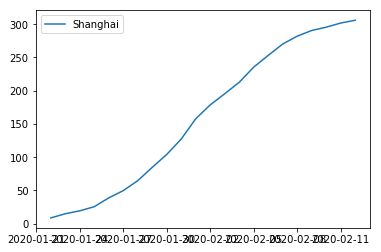

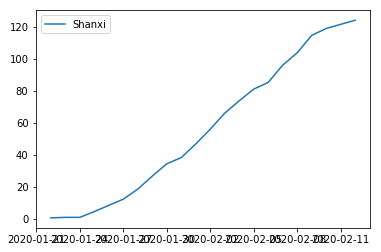

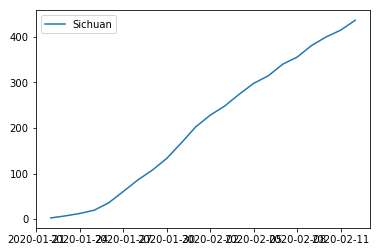

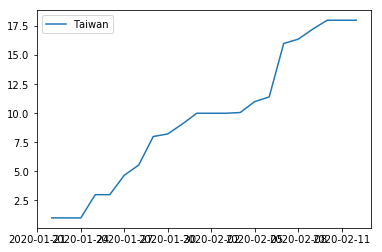

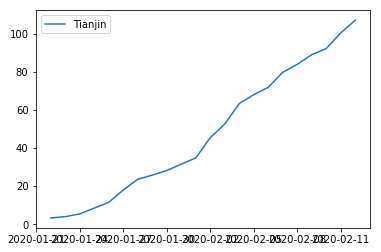

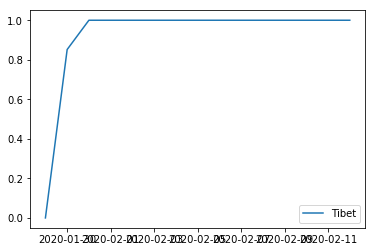

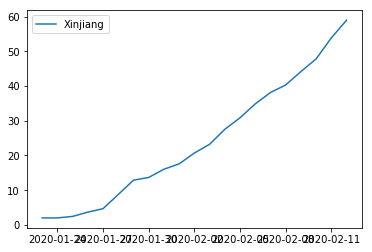

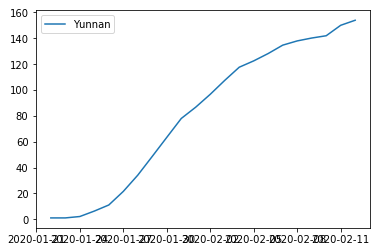

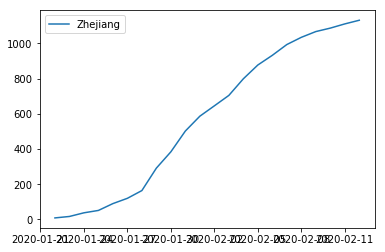

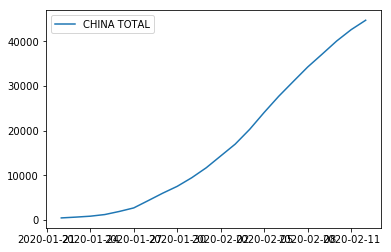

In [22]:
use_name = [ ]
for i,name in enumerate(province):  #绘制各省确诊人数，并累加
    if name!='CHINA TOTAL':
        plt.figure(i)
        plt.plot(province_data.loc[name]['confirm'])
        plt.legend([name])
        total = total.add(province_data.loc[name],  fill_value=0)
        if name not in ['Hubei','Taiwan','Macau','Hong Kong']:
            use_name.append(name)
            except_hb = except_hb.add(province_data.loc[name],fill_value =0)
plt.figure(i+1)
plt.plot(total['confirm'])
plt.legend(["CHINA TOTAL"])



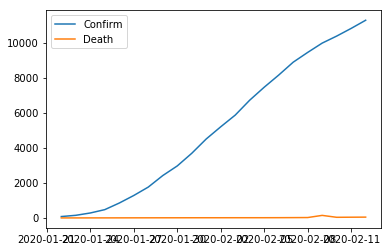

In [23]:
plt.plot(except_hb)
plt.legend(["Confirm",'Death'])

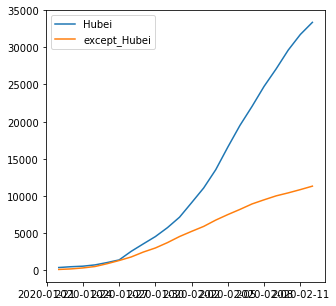

In [24]:
plt.figure(figsize=(5,5))
plt.plot(province_data.loc['Hubei']['confirm'])
plt.plot(except_hb['confirm'])

plt.legend(['Hubei','except_Hubei'])

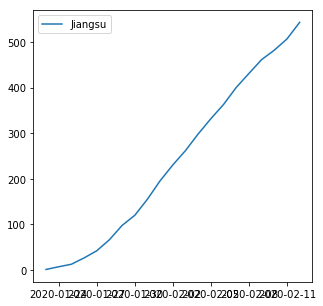

In [25]:
plt.figure(figsize=(5,5))
plt.plot(province_data.loc['Jiangsu']['confirm'])
plt.legend(['Jiangsu'])

In [26]:
total['confirm']

date_time
2020-01-22      417.605820
2020-01-23      596.659951
2020-01-24      803.666667
2020-01-25     1171.928571
2020-01-26     1864.500000
2020-01-27     2662.166667
2020-01-28     4302.650000
2020-01-29     5966.148148
2020-01-30     7502.444444
2020-01-31     9429.178571
2020-02-01    11660.564103
2020-02-02    14313.903226
2020-02-03    16966.428571
2020-02-04    20286.290323
2020-02-05    24078.586207
2020-02-06    27685.812500
2020-02-07    30986.812500
2020-02-08    34255.000000
2020-02-09    37145.653846
2020-02-10    40087.750000
2020-02-11    42631.000000
2020-02-12    44742.000000
Name: confirm, dtype: float64

In [27]:
except_hb['confirm']

date_time
2020-01-22       78.272487
2020-01-23      148.882173
2020-01-24      281.750000
2020-01-25      473.071429
2020-01-26      850.333333
2020-01-27     1281.500000
2020-01-28     1762.000000
2020-01-29     2420.037037
2020-01-30     2970.666667
2020-01-31     3692.214286
2020-02-01     4512.666667
2020-02-02     5208.516129
2020-02-03     5876.685714
2020-02-04     6729.548387
2020-02-05     7470.586207
2020-02-06     8164.906250
2020-02-07     8901.156250
2020-02-08     9460.185185
2020-02-09     9991.846154
2020-02-10    10393.458333
2020-02-11    10832.863636
2020-02-12    11299.000000
Name: confirm, dtype: float64

### 开始训练LSTM

In [28]:
new_data = total['confirm']

In [165]:
np.diff(new_data)

array([ 179.05413105,  207.00671551,  368.26190476,  692.57142857,
        797.66666667, 1640.48333333, 1663.49814815, 1536.2962963 ,
       1926.73412698, 2231.38553114, 2653.33912324, 2652.52534562,
       3319.86175115, 3792.29588432, 3607.2262931 , 3301.        ,
       3268.1875    , 2890.65384615, 2942.09615385, 2543.25      ,
       2111.        ])

In [166]:
(np.diff(except_hb['confirm']))

array([ 70.60968661, 132.86782662, 191.32142857, 377.26190476,
       431.16666667, 480.5       , 658.03703704, 550.62962963,
       721.54761905, 820.45238095, 695.84946237, 668.16958525,
       852.86267281, 741.0378198 , 694.3200431 , 736.25      ,
       559.02893519, 531.66096866, 401.61217949, 439.40530303,
       466.13636364])

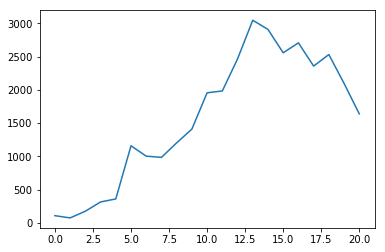

In [239]:
plt.plot(np.diff(province_data.loc['Hubei']['confirm']))


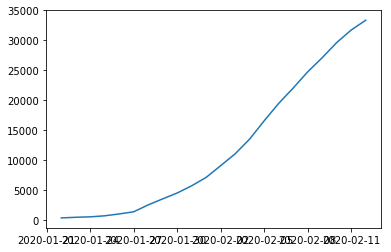

In [240]:
plt.plot(province_data.loc['Hubei']['confirm'])

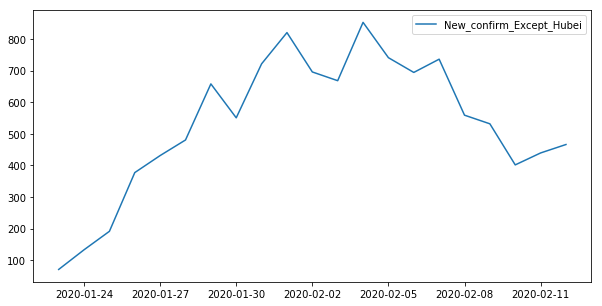

In [219]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(np.diff(except_hb['confirm']),index=pd.date_range(start='2020-01-23', end='2020-02-12')))
plt.legend(['New_confirm_Except_Hubei'])

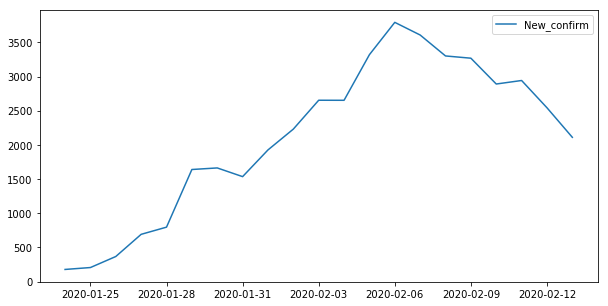

In [236]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(np.diff(total['confirm']),index=pd.date_range(start='2020-01-24', end='2020-02-13')))
plt.legend(['New_confirm'])

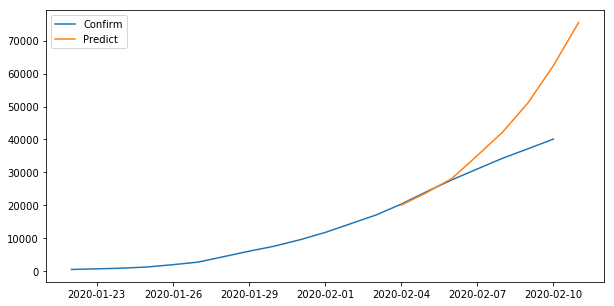

In [235]:
plt.figure(figsize=(10,5))
plt.plot(total['confirm'][:-2])
old_pred = [19999,23785,28102,35069,42213,51113,62418,75612,91834,111648]
plt.plot(pd.DataFrame(old_pred[:-2],index=pd.date_range(start='2020-02-04', end='2020-02-11')))
plt.legend(['Confirm','Predict'])

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(np.diff(except_hb['confirm']),index=pd.date_range(start='2020-01-23', end='2020-02-12')))
plt.legend(['New_confirm_Except_Hubei'])

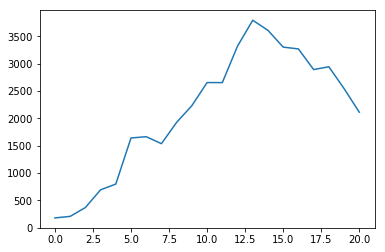

In [168]:
plt.plot(np.diff(new_data)) #一阶

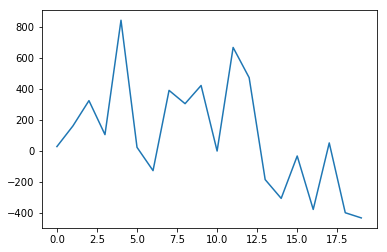

In [29]:
plt.plot(np.diff(np.diff(new_data))) #二阶

In [201]:
diff_ = np.diff(except_hb['confirm'])

In [176]:
diff_

array([ 70.60968661, 132.86782662, 191.32142857, 377.26190476,
       431.16666667, 480.5       , 658.03703704, 550.62962963,
       721.54761905, 820.45238095, 695.84946237, 668.16958525,
       852.86267281, 741.0378198 , 694.3200431 , 736.25      ,
       559.02893519, 531.66096866, 401.61217949, 439.40530303,
       466.13636364])

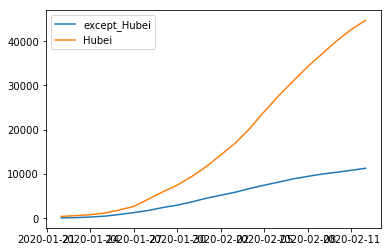

In [174]:
plt.plot(except_hb['confirm'])
plt.plot(new_data)
plt.legend(['except_Hubei','Hubei'])

# 预测新增人数曲线

In [177]:

'''
下面的split_sequence（）函数实现了这种行为，并将给定的单变量序列分成多个样本，其中每个样本具有指定的时间步长，输出是单个时间步。
'''
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
 
if __name__ == '__main__':
 
    # define input sequence
    raw_seq = diff_[:]
    print(raw_seq)
    # choose a number of time steps
    n_steps = 4
    # split into samples
   # raw_seq,train_low,train_high = Normalize(raw_seq)
    
    X, y = split_sequence(raw_seq, n_steps)
    print(X, y)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(25, activation='relu', input_shape=(n_steps, n_features)))  # 隐藏层，输入，特征维
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=300, batch_size=1, verbose=100)  # 迭代次数，批次数，verbose决定是否显示每次迭代
    # demonstrate prediction
    x_input = array(diff_[-4:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(x_input, yhat)
    print(yhat)


[ 70.60968661 132.86782662 191.32142857 377.26190476 431.16666667
 480.5        658.03703704 550.62962963 721.54761905 820.45238095
 695.84946237 668.16958525 852.86267281 741.0378198  694.3200431
 736.25       559.02893519 531.66096866 401.61217949 439.40530303
 466.13636364]
[[ 70.60968661 132.86782662 191.32142857 377.26190476]
 [132.86782662 191.32142857 377.26190476 431.16666667]
 [191.32142857 377.26190476 431.16666667 480.5       ]
 [377.26190476 431.16666667 480.5        658.03703704]
 [431.16666667 480.5        658.03703704 550.62962963]
 [480.5        658.03703704 550.62962963 721.54761905]
 [658.03703704 550.62962963 721.54761905 820.45238095]
 [550.62962963 721.54761905 820.45238095 695.84946237]
 [721.54761905 820.45238095 695.84946237 668.16958525]
 [820.45238095 695.84946237 668.16958525 852.86267281]
 [695.84946237 668.16958525 852.86267281 741.0378198 ]
 [668.16958525 852.86267281 741.0378198  694.3200431 ]
 [852.86267281 741.0378198  694.3200431  736.25      ]
 [741.0

In [178]:

print(x_input)
    
for i in range(10):
    yhat = model.predict(x_input[-4:].reshape((1, n_steps, n_features)), verbose=0)
    x_input=np.append(x_input,yhat)
    print(yhat)
print(x_input)

[[[531.66096866]
  [401.61217949]
  [439.40530303]
  [466.13636364]]]
[[402.63492]]
[[434.6163]]
[[420.30966]]
[[396.53598]]
[[408.7728]]
[[389.7665]]
[[381.68808]]
[[380.95264]]
[[366.82077]]
[[362.53732]]
[531.66096866 401.61217949 439.40530303 466.13636364 402.63491821
 434.61630249 420.30966187 396.53598022 408.77279663 389.76651001
 381.68807983 380.95263672 366.82077026 362.537323  ]


In [179]:
x_input

array([531.66096866, 401.61217949, 439.40530303, 466.13636364,
       402.63491821, 434.61630249, 420.30966187, 396.53598022,
       408.77279663, 389.76651001, 381.68807983, 380.95263672,
       366.82077026, 362.537323  ])

In [185]:

diff_ = list(diff_)
add = list(x_input[4:])


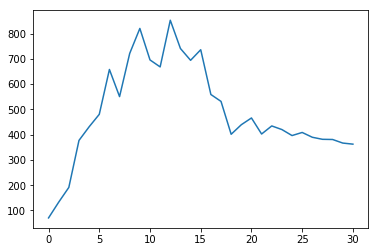

In [186]:
plt.plot(diff_+add)

In [187]:
np.diff(new_data)

array([ 179.05413105,  207.00671551,  368.26190476,  692.57142857,
        797.66666667, 1640.48333333, 1663.49814815, 1536.2962963 ,
       1926.73412698, 2231.38553114, 2653.33912324, 2652.52534562,
       3319.86175115, 3792.29588432, 3607.2262931 , 3301.        ,
       3268.1875    , 2890.65384615, 2942.09615385, 2543.25      ,
       2111.        ])

In [188]:
diff_

[70.6096866096866,
 132.86782661782667,
 191.3214285714285,
 377.2619047619048,
 431.16666666666686,
 480.49999999999955,
 658.0370370370367,
 550.62962962963,
 721.5476190476188,
 820.4523809523807,
 695.8494623655924,
 668.1695852534549,
 852.8626728110612,
 741.0378197997761,
 694.3200431034493,
 736.25,
 559.0289351851861,
 531.6609686609663,
 401.6121794871833,
 439.4053030303039,
 466.13636363636033]

In [202]:

diff_ = list(diff_)
add = list(x_input[4:])


In [203]:
all_ = diff_+add
all_

[70.6096866096866,
 132.86782661782667,
 191.3214285714285,
 377.2619047619048,
 431.16666666666686,
 480.49999999999955,
 658.0370370370367,
 550.62962962963,
 721.5476190476188,
 820.4523809523807,
 695.8494623655924,
 668.1695852534549,
 852.8626728110612,
 741.0378197997761,
 694.3200431034493,
 736.25,
 559.0289351851861,
 531.6609686609663,
 401.6121794871833,
 439.4053030303039,
 466.13636363636033,
 402.6349182128906,
 434.6163024902344,
 420.3096618652344,
 396.5359802246094,
 408.7727966308594,
 389.7665100097656,
 381.6880798339844,
 380.95263671875,
 366.8207702636719,
 362.5373229980469]

In [204]:
pd.DataFrame(all_,index=pd.date_range(start='2020-01-22', end='2020-02-21'))

,0
2020-01-22,70.609687
2020-01-23,132.867827
2020-01-24,191.321429
2020-01-25,377.261905
2020-01-26,431.166667
2020-01-27,480.500000
2020-01-28,658.037037
2020-01-29,550.629630
2020-01-30,721.547619
2020-01-31,820.452381


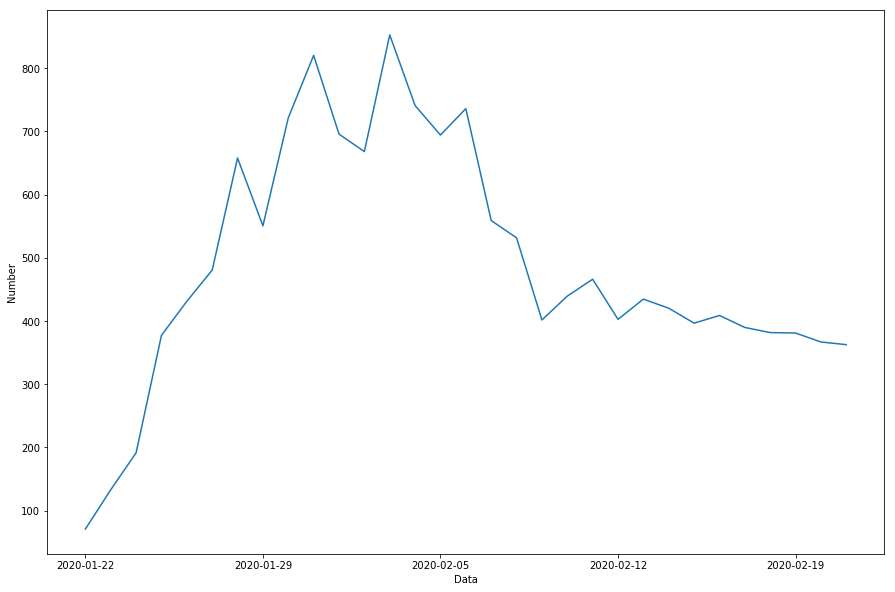

In [205]:
all_predict =pd.DataFrame(all_,index=pd.date_range(start='2020-01-22', end='2020-02-21'))
plt.figure(figsize=(15,10))
plt.plot(all_predict)
plt.xlabel('Data')
plt.ylabel('Number')

# 预测确诊人数曲线

In [208]:

'''
下面的split_sequence（）函数实现了这种行为，并将给定的单变量序列分成多个样本，其中每个样本具有指定的时间步长，输出是单个时间步。
'''
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
 
if __name__ == '__main__':
 
    # define input sequence
    raw_seq = new_data
    print(raw_seq)
    # choose a number of time steps
    n_steps = 3
    # split into samples
   # raw_seq,train_low,train_high = Normalize(raw_seq)
    
    X, y = split_sequence(raw_seq, n_steps)
    print(X, y)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))  # 隐藏层，输入，特征维
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=300, batch_size=1, verbose=100)  # 迭代次数，批次数，verbose决定是否显示每次迭代
    # demonstrate prediction
    x_input = array(new_data[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(x_input, yhat)
    print(yhat)


date_time
2020-01-22      417.605820
2020-01-23      596.659951
2020-01-24      803.666667
2020-01-25     1171.928571
2020-01-26     1864.500000
2020-01-27     2662.166667
2020-01-28     4302.650000
2020-01-29     5966.148148
2020-01-30     7502.444444
2020-01-31     9429.178571
2020-02-01    11660.564103
2020-02-02    14313.903226
2020-02-03    16966.428571
2020-02-04    20286.290323
2020-02-05    24078.586207
2020-02-06    27685.812500
2020-02-07    30986.812500
2020-02-08    34255.000000
2020-02-09    37145.653846
2020-02-10    40087.750000
2020-02-11    42631.000000
2020-02-12    44742.000000
Name: confirm, dtype: float64
[[  417.60582011   596.65995116   803.66666667]
 [  596.65995116   803.66666667  1171.92857143]
 [  803.66666667  1171.92857143  1864.5       ]
 [ 1171.92857143  1864.5         2662.16666667]
 [ 1864.5         2662.16666667  4302.65      ]
 [ 2662.16666667  4302.65        5966.14814815]
 [ 4302.65        5966.14814815  7502.44444444]
 [ 5966.14814815  7502.4444444

In [209]:
x_input = array(new_data[-3:])
x_input = x_input.reshape((1, n_steps, n_features))

print(x_input)
    
for i in range(10):
    yhat = model.predict(x_input[-3:].reshape((1, n_steps, n_features)), verbose=0)
    x_input=np.append(x_input,yhat)
    print(yhat)
print(x_input)

[[[40087.75]
  [42631.  ]
  [44742.  ]]]
[[51039.31]]
[[55897.99]]
[[61658.684]]
[[68208.43]]
[[75255.055]]
[[83101.555]]
[[91763.555]]
[[101314.46]]
[[111866.52]]
[[123515.09]]
[ 40087.75        42631.          44742.          51039.30859375
  55897.98828125  61658.68359375  68208.4296875   75255.0546875
  83101.5546875   91763.5546875  101314.4609375  111866.5234375
 123515.09375   ]


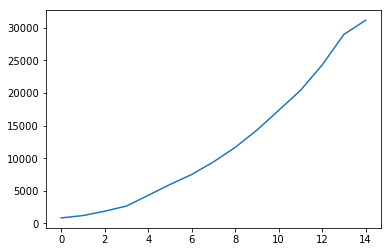

In [73]:
plt.plot(new_data)

In [74]:
x_input

array([ 24300.       ,  28985.       ,  31161.       ,  39642.8828125,
        46360.796875 ,  54133.8515625,  65248.90625  ,  76881.9453125,
        91021.671875 , 108285.609375 , 128138.1171875, 151947.109375 ,
       180256.6875   ])

In [165]:
all_predict

2020-01-24       837.166667
2020-01-25      1200.000000
2020-01-26      1864.500000
2020-01-27      2662.166667
2020-01-28      4302.650000
2020-01-29      5966.148148
2020-01-30      7502.444444
2020-01-31      9429.178571
2020-02-01     11660.564103
2020-02-02     14313.903226
2020-02-03     14530.500000
2020-02-04     19999.841797
2020-02-05     23785.511719
2020-02-06     28102.070312
2020-02-07     35069.691406
2020-02-08     42213.648438
2020-02-09     51113.054688
2020-02-10     62418.539062
2020-02-11     75612.031250
2020-02-12     91834.484375
2020-02-13    111648.765625
dtype: float64

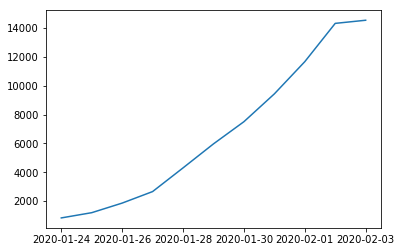

In [130]:
plt.plot(total['confirm'])